# Time Series Prediction (LSTM)

##  Importing important packages and libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import statistics
import warnings
from sklearn import metrics
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

In [2]:
wdf = pd.read_csv('D:/Deakin University (Applied AI (Professional)/SIT764- Team Project (A)/Datasets & Notebooks/New Cleaned & Merged Datasets/clustered_data.csv')
wdf = wdf.drop('Unnamed: 0', axis=1)
wdf

,total,left,left_avg,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,Lockdown_stage,Clusters,cluster_type
0,27.0,14.0,1.0,20,9,18,20,20,7,0,Sparse
1,33.0,13.0,1.0,20,9,18,20,20,7,0,Sparse
2,72.0,23.0,1.0,20,8,18,20,20,7,0,Sparse
3,16.0,14.0,1.0,19,9,17,20,20,7,0,Sparse
4,19.0,10.0,3.0,19,9,17,20,20,7,0,Sparse
...,...,...,...,...,...,...,...,...,...,...,...
1049328,0.0,0.0,0.0,1,0,2,2,0,6,0,Sparse
1049329,0.0,0.0,0.0,20,13,18,20,20,6,0,Sparse
1049330,138.0,297.0,18.5,1,3,9,20,2,6,2,Normal
1049331,0.0,0.0,0.0,20,8,18,20,20,6,0,Sparse


In [3]:
print("\nData size :",wdf.shape)
print("\nNumber of records :",len(wdf))
print("\nNumber of atrributes :",len(wdf.columns))
print("\nDataset Information :", wdf.info())
wdf.describe()


Data size : (1049333, 11)

Number of records : 1049333

Number of atrributes : 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049333 entries, 0 to 1049332
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   total              1049333 non-null  float64
 1   left               1049333 non-null  float64
 2   left_avg           1049333 non-null  float64
 3   hospitals_count    1049333 non-null  int64  
 4   libraries_count    1049333 non-null  int64  
 5   gyms_count         1049333 non-null  int64  
 6   restaurants_count  1049333 non-null  int64  
 7   malls_count        1049333 non-null  int64  
 8   Lockdown_stage     1049333 non-null  int64  
 9   Clusters           1049333 non-null  int64  
 10  cluster_type       1049333 non-null  object 
dtypes: float64(3), int64(7), object(1)
memory usage: 88.1+ MB

Dataset Information : None


,total,left,left_avg,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,Lockdown_stage,Clusters
count,1.049333e+06,1.049333e+06,1.049333e+06,1.049333e+06,1.049333e+06,1.049333e+06,1.049333e+06,1.049333e+06,1.049333e+06,1.049333e+06
mean,2.635191e+01,2.545161e+01,1.456252e+00,1.423252e+01,5.883452e+00,1.439656e+01,1.904901e+01,1.368412e+01,5.001414e+00,1.321258e-01
std,4.766154e+01,6.865444e+01,4.238209e+00,8.300350e+00,3.874244e+00,5.589933e+00,3.255350e+00,8.238506e+00,2.844142e+00,4.914555e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,9.000000e+00,2.000000e+01,5.000000e+00,1.000000e+00,0.000000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,2.000000e+01,8.000000e+00,1.700000e+01,2.000000e+01,2.000000e+01,7.000000e+00,0.000000e+00
75%,3.115188e+01,2.200000e+01,1.000000e+00,2.000000e+01,9.000000e+00,1.800000e+01,2.000000e+01,2.000000e+01,7.000000e+00,0.000000e+00
max,5.000000e+02,1.448000e+03,6.233000e+02,2.000000e+01,1.300000e+01,2.000000e+01,2.000000e+01,2.000000e+01,7.000000e+00,2.000000e+00


In [4]:
#check if there are any missing values in the dataframe?
print(" \nCount total number of missing values in the DataFrame : \n\n", wdf.isnull().sum().sum())

 
Count total number of missing values in the DataFrame : 

 0


In [5]:
#Dropping 'cluster_type' column
wdf = wdf.drop(['cluster_type'], axis=1)
wdf

,total,left,left_avg,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,Lockdown_stage,Clusters
0,27.0,14.0,1.0,20,9,18,20,20,7,0
1,33.0,13.0,1.0,20,9,18,20,20,7,0
2,72.0,23.0,1.0,20,8,18,20,20,7,0
3,16.0,14.0,1.0,19,9,17,20,20,7,0
4,19.0,10.0,3.0,19,9,17,20,20,7,0
...,...,...,...,...,...,...,...,...,...,...
1049328,0.0,0.0,0.0,1,0,2,2,0,6,0
1049329,0.0,0.0,0.0,20,13,18,20,20,6,0
1049330,138.0,297.0,18.5,1,3,9,20,2,6,2
1049331,0.0,0.0,0.0,20,8,18,20,20,6,0


<AxesSubplot:>

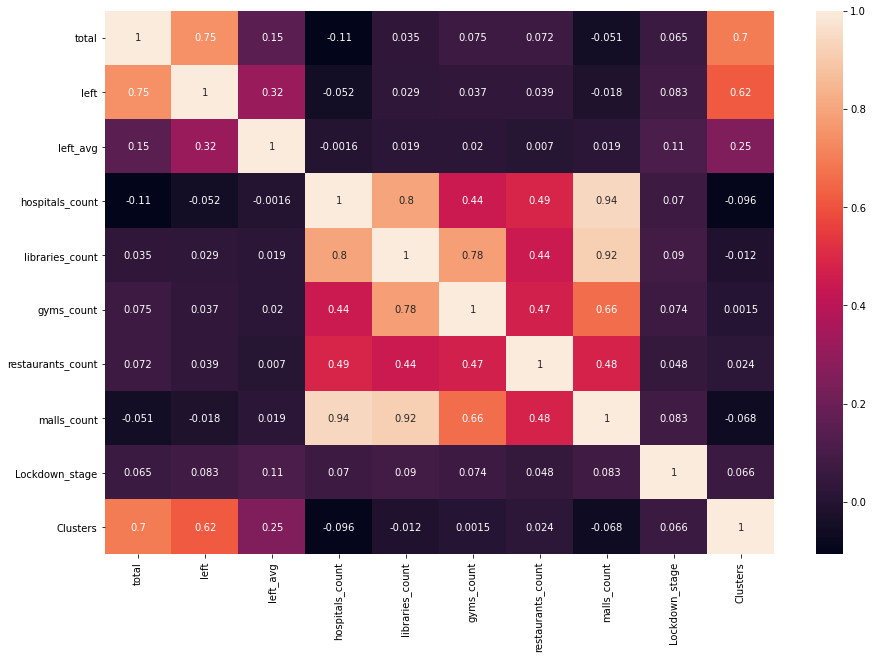

In [6]:
#Correlation matrix
wdf.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(wdf.corr(), annot = True)

In [7]:
wdf['Clusters'].value_counts()

0    977248
2     66559
1      5526
Name: Clusters, dtype: int64

### Series to supervised conversion

In [8]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [9]:
dataset = wdf.copy()

In [10]:
dataset = series_to_supervised(dataset)
data = pd.DataFrame(dataset)

In [11]:
data

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
1,27.0,14.0,1.0,20.0,9.0,18.0,20.0,20.0,7.0,0.0,33.0,13.0,1.0,20,9,18,20,20,7,0
2,33.0,13.0,1.0,20.0,9.0,18.0,20.0,20.0,7.0,0.0,72.0,23.0,1.0,20,8,18,20,20,7,0
3,72.0,23.0,1.0,20.0,8.0,18.0,20.0,20.0,7.0,0.0,16.0,14.0,1.0,19,9,17,20,20,7,0
4,16.0,14.0,1.0,19.0,9.0,17.0,20.0,20.0,7.0,0.0,19.0,10.0,3.0,19,9,17,20,20,7,0
5,19.0,10.0,3.0,19.0,9.0,17.0,20.0,20.0,7.0,0.0,61.0,49.0,1.0,20,8,18,20,20,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049328,38.0,89.0,15.7,1.0,3.0,20.0,20.0,5.0,6.0,2.0,0.0,0.0,0.0,1,0,2,2,0,6,0
1049329,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,20,13,18,20,20,6,0
1049330,0.0,0.0,0.0,20.0,13.0,18.0,20.0,20.0,6.0,0.0,138.0,297.0,18.5,1,3,9,20,2,6,2
1049331,138.0,297.0,18.5,1.0,3.0,9.0,20.0,2.0,6.0,2.0,0.0,0.0,0.0,20,8,18,20,20,6,0


In [12]:
data = data.drop('var10(t-1)', axis=1)
data

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
1,27.0,14.0,1.0,20.0,9.0,18.0,20.0,20.0,7.0,33.0,13.0,1.0,20,9,18,20,20,7,0
2,33.0,13.0,1.0,20.0,9.0,18.0,20.0,20.0,7.0,72.0,23.0,1.0,20,8,18,20,20,7,0
3,72.0,23.0,1.0,20.0,8.0,18.0,20.0,20.0,7.0,16.0,14.0,1.0,19,9,17,20,20,7,0
4,16.0,14.0,1.0,19.0,9.0,17.0,20.0,20.0,7.0,19.0,10.0,3.0,19,9,17,20,20,7,0
5,19.0,10.0,3.0,19.0,9.0,17.0,20.0,20.0,7.0,61.0,49.0,1.0,20,8,18,20,20,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049328,38.0,89.0,15.7,1.0,3.0,20.0,20.0,5.0,6.0,0.0,0.0,0.0,1,0,2,2,0,6,0
1049329,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,20,13,18,20,20,6,0
1049330,0.0,0.0,0.0,20.0,13.0,18.0,20.0,20.0,6.0,138.0,297.0,18.5,1,3,9,20,2,6,2
1049331,138.0,297.0,18.5,1.0,3.0,9.0,20.0,2.0,6.0,0.0,0.0,0.0,20,8,18,20,20,6,0


In [13]:
# Preprocessing
# Splitting data into features and target variable

X = data # Features
y = data['var10(t)'] # Target variable

In [14]:
X

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
1,27.0,14.0,1.0,20.0,9.0,18.0,20.0,20.0,7.0,33.0,13.0,1.0,20,9,18,20,20,7,0
2,33.0,13.0,1.0,20.0,9.0,18.0,20.0,20.0,7.0,72.0,23.0,1.0,20,8,18,20,20,7,0
3,72.0,23.0,1.0,20.0,8.0,18.0,20.0,20.0,7.0,16.0,14.0,1.0,19,9,17,20,20,7,0
4,16.0,14.0,1.0,19.0,9.0,17.0,20.0,20.0,7.0,19.0,10.0,3.0,19,9,17,20,20,7,0
5,19.0,10.0,3.0,19.0,9.0,17.0,20.0,20.0,7.0,61.0,49.0,1.0,20,8,18,20,20,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049328,38.0,89.0,15.7,1.0,3.0,20.0,20.0,5.0,6.0,0.0,0.0,0.0,1,0,2,2,0,6,0
1049329,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,20,13,18,20,20,6,0
1049330,0.0,0.0,0.0,20.0,13.0,18.0,20.0,20.0,6.0,138.0,297.0,18.5,1,3,9,20,2,6,2
1049331,138.0,297.0,18.5,1.0,3.0,9.0,20.0,2.0,6.0,0.0,0.0,0.0,20,8,18,20,20,6,0


In [15]:
y

1          0
2          0
3          0
4          0
5          0
          ..
1049328    0
1049329    0
1049330    2
1049331    0
1049332    2
Name: var10(t), Length: 1049332, dtype: int64

In [16]:
X.shape, y.shape

((1049332, 19), (1049332,))

## Taking X & Y Cluster values as 1 and 2


In [17]:
X_1_2 = X[X['var10(t)'] != 0]

y_1_2 = y[y != 0]


In [18]:
X_1_2

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
558,46.000000,20.000000,1.0,20.0,9.0,18.0,20.0,20.0,7.0,93.0,102.0,1.0,20,8,18,20,20,7,2
2031,62.000000,41.000000,1.0,20.0,8.0,18.0,20.0,20.0,7.0,84.0,98.0,1.0,19,9,17,20,20,7,2
2033,54.000000,35.000000,1.0,20.0,9.0,18.0,20.0,20.0,7.0,94.0,90.0,1.0,19,9,17,20,20,7,2
2371,43.000000,21.000000,1.0,19.0,9.0,17.0,20.0,20.0,7.0,57.0,95.0,1.0,20,9,18,20,20,7,2
2391,74.000000,37.000000,1.0,20.0,8.0,18.0,20.0,20.0,7.0,64.0,89.0,1.0,19,9,17,20,20,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049323,0.000000,0.000000,0.0,20.0,13.0,18.0,20.0,20.0,6.0,175.0,462.0,14.5,1,3,9,20,2,6,1
1049324,175.000000,462.000000,14.5,1.0,3.0,9.0,20.0,2.0,6.0,85.0,155.0,11.7,20,9,20,20,20,6,2
1049327,31.151885,67.783524,6.2,20.0,13.0,16.0,20.0,20.0,6.0,38.0,89.0,15.7,1,3,20,20,5,6,2
1049330,0.000000,0.000000,0.0,20.0,13.0,18.0,20.0,20.0,6.0,138.0,297.0,18.5,1,3,9,20,2,6,2


In [19]:
y_1_2

558        2
2031       2
2033       2
2371       2
2391       2
          ..
1049323    1
1049324    2
1049327    2
1049330    2
1049332    2
Name: var10(t), Length: 72085, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_1_2, y_1_2, test_size=0.3, random_state=1) # 70% training and 30% test

In [21]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (50459, 19)
X_test shape  is :  (21626, 19)
y_train shape is :  (50459,)
y_test shape is  :  (21626,)


In [22]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))

Original dataset shape Counter({2: 46544, 1: 3915})


## Using SMOTE

In [23]:
# Implement SMOTE
over = SMOTE(random_state = 100)
X_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_resampled)))

Original dataset shape Counter({2: 46544, 1: 3915})
Resampled dataset shape Counter({2: 46544, 1: 46544})


In [24]:
X_train_resampled

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
0,2.000000,0.000000,0.000000,20.000000,8.000000,18.000000,20.000000,20.000000,7.000000,187.000000,104.000000,0.000000,0,0,8,11,0,7,2
1,9.000000,10.000000,0.000000,20.000000,9.000000,20.000000,20.000000,20.000000,7.000000,110.000000,95.000000,0.000000,20,13,18,20,20,7,2
2,7.000000,11.000000,1.000000,13.000000,0.000000,3.000000,20.000000,3.000000,7.000000,284.000000,216.000000,0.000000,20,9,17,20,20,7,2
3,146.000000,99.000000,1.000000,0.000000,0.000000,7.000000,18.000000,2.000000,7.000000,139.000000,114.000000,1.000000,0,0,7,18,2,7,2
4,19.000000,15.000000,1.000000,20.000000,13.000000,18.000000,20.000000,20.000000,0.000000,98.000000,163.000000,1.000000,1,3,9,20,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93083,0.122737,0.122737,0.208653,11.527153,0.000000,2.877263,17.790730,2.631788,7.000000,345.649891,1011.754526,9.303620,20,9,17,20,20,7,1
93084,0.918674,1.531123,1.898592,6.818266,4.531123,19.387551,20.000000,9.593368,7.000000,325.287144,892.612449,13.791867,0,0,10,18,2,7,1
93085,210.659219,553.757866,13.971303,18.838577,3.991032,10.089679,20.000000,15.901353,6.991032,197.269038,651.659219,9.042149,20,9,17,20,20,6,1
93086,0.000000,0.000000,0.000000,7.046862,0.000000,4.831735,19.084133,2.542066,7.000000,269.626199,826.084133,10.176678,20,9,17,20,20,7,1


In [25]:
y_train_resampled

0        2
1        2
2        2
3        2
4        2
        ..
93083    1
93084    1
93085    1
93086    1
93087    1
Name: var10(t), Length: 93088, dtype: int64

## Taking X & Y Cluster values as 0 and 2


In [26]:
X_0_2 = X[X['var10(t)'] != 1]

y_0_2 = y[y != 1]

In [27]:
X_0_2

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
1,27.0,14.0,1.0,20.0,9.0,18.0,20.0,20.0,7.0,33.0,13.0,1.0,20,9,18,20,20,7,0
2,33.0,13.0,1.0,20.0,9.0,18.0,20.0,20.0,7.0,72.0,23.0,1.0,20,8,18,20,20,7,0
3,72.0,23.0,1.0,20.0,8.0,18.0,20.0,20.0,7.0,16.0,14.0,1.0,19,9,17,20,20,7,0
4,16.0,14.0,1.0,19.0,9.0,17.0,20.0,20.0,7.0,19.0,10.0,3.0,19,9,17,20,20,7,0
5,19.0,10.0,3.0,19.0,9.0,17.0,20.0,20.0,7.0,61.0,49.0,1.0,20,8,18,20,20,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049328,38.0,89.0,15.7,1.0,3.0,20.0,20.0,5.0,6.0,0.0,0.0,0.0,1,0,2,2,0,6,0
1049329,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,20,13,18,20,20,6,0
1049330,0.0,0.0,0.0,20.0,13.0,18.0,20.0,20.0,6.0,138.0,297.0,18.5,1,3,9,20,2,6,2
1049331,138.0,297.0,18.5,1.0,3.0,9.0,20.0,2.0,6.0,0.0,0.0,0.0,20,8,18,20,20,6,0


In [28]:
y_0_2

1          0
2          0
3          0
4          0
5          0
          ..
1049328    0
1049329    0
1049330    2
1049331    0
1049332    2
Name: var10(t), Length: 1043806, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_0_2, y_0_2, test_size=0.3, random_state=1) # 70% training and 30% test

In [30]:
# Check the shape of all of these
print("X_train shape is : ", X_train_new.shape)
print("X_test shape  is : ", X_test_new.shape)
print("y_train shape is : ", y_train_new.shape)
print("y_test shape is  : ", y_test_new.shape)

X_train shape is :  (730664, 19)
X_test shape  is :  (313142, 19)
y_train shape is :  (730664,)
y_test shape is  :  (313142,)


In [31]:
print('Original dataset shape %s' % Counter(y_train_new.values.ravel()))

Original dataset shape Counter({0: 684007, 2: 46657})


## Using RandomUnderSampler


In [32]:
# Undersampling
under = RandomUnderSampler(sampling_strategy='majority')
X_new, y_new = under.fit_resample(X_train_new, y_train_new)
print('Original dataset shape {}'.format(Counter(y_train_new)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

Original dataset shape Counter({0: 684007, 2: 46657})
Resampled dataset shape Counter({0: 46657, 2: 46657})


In [33]:
X_new

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
0,35.0,31.0,1.0,20.0,8.0,18.0,20.0,20.0,7.0,2.0,6.0,1.0,0,0,7,18,2,7,0
1,170.0,113.0,1.0,1.0,3.0,9.0,20.0,2.0,7.0,7.0,4.0,1.0,20,8,17,20,20,7,0
2,5.0,4.0,0.0,20.0,9.0,18.0,20.0,20.0,7.0,3.0,1.0,11.0,20,8,17,20,20,7,0
3,74.0,36.0,0.0,19.0,4.0,10.0,20.0,16.0,7.0,53.0,50.0,1.0,20,9,17,20,20,7,0
4,0.0,0.0,0.0,20.0,8.0,18.0,20.0,20.0,1.0,2.0,0.0,0.0,1,3,20,20,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93309,2.0,3.0,3.3,0.0,0.0,7.0,18.0,2.0,7.0,151.0,329.0,16.7,1,3,9,20,2,7,2
93310,0.0,0.0,0.0,13.0,0.0,3.0,20.0,3.0,4.0,140.0,232.0,13.9,20,9,17,20,20,4,2
93311,17.0,12.0,0.0,20.0,9.0,16.0,20.0,20.0,7.0,136.0,116.0,1.0,20,9,17,20,20,1,2
93312,36.0,42.0,2.0,1.0,3.0,20.0,20.0,2.0,1.0,150.0,111.0,1.0,20,8,18,20,20,7,2


In [34]:
y_new

0        0
1        0
2        0
3        0
4        0
        ..
93309    2
93310    2
93311    2
93312    2
93313    2
Name: var10(t), Length: 93314, dtype: int64

In [35]:
X_new['var10(t)'].value_counts()

0    46657
2    46657
Name: var10(t), dtype: int64

In [36]:
X_train_resampled['var10(t)'].value_counts()

1    46544
2    46544
Name: var10(t), dtype: int64

In [37]:
M = X_new.append(X_train_resampled[X_train_resampled['var10(t)'] != 2])

In [38]:
M

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
0,35.000000,31.000000,1.000000,20.000000,8.000000,18.000000,20.000000,20.000000,7.000000,2.000000,6.000000,1.000000,0,0,7,18,2,7,0
1,170.000000,113.000000,1.000000,1.000000,3.000000,9.000000,20.000000,2.000000,7.000000,7.000000,4.000000,1.000000,20,8,17,20,20,7,0
2,5.000000,4.000000,0.000000,20.000000,9.000000,18.000000,20.000000,20.000000,7.000000,3.000000,1.000000,11.000000,20,8,17,20,20,7,0
3,74.000000,36.000000,0.000000,19.000000,4.000000,10.000000,20.000000,16.000000,7.000000,53.000000,50.000000,1.000000,20,9,17,20,20,7,0
4,0.000000,0.000000,0.000000,20.000000,8.000000,18.000000,20.000000,20.000000,1.000000,2.000000,0.000000,0.000000,1,3,20,20,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93083,0.122737,0.122737,0.208653,11.527153,0.000000,2.877263,17.790730,2.631788,7.000000,345.649891,1011.754526,9.303620,20,9,17,20,20,7,1
93084,0.918674,1.531123,1.898592,6.818266,4.531123,19.387551,20.000000,9.593368,7.000000,325.287144,892.612449,13.791867,0,0,10,18,2,7,1
93085,210.659219,553.757866,13.971303,18.838577,3.991032,10.089679,20.000000,15.901353,6.991032,197.269038,651.659219,9.042149,20,9,17,20,20,6,1
93086,0.000000,0.000000,0.000000,7.046862,0.000000,4.831735,19.084133,2.542066,7.000000,269.626199,826.084133,10.176678,20,9,17,20,20,7,1


In [39]:
M['var10(t)'].value_counts()

0    46657
2    46657
1    46544
Name: var10(t), dtype: int64

In [40]:
N = y_new.append(y_train_resampled[y_train_resampled!= 2])

In [41]:
N

0        0
1        0
2        0
3        0
4        0
        ..
93083    1
93084    1
93085    1
93086    1
93087    1
Name: var10(t), Length: 139858, dtype: int64

In [42]:
N.value_counts()

0    46657
2    46657
1    46544
Name: var10(t), dtype: int64

In [43]:
dataset1 = M.copy()

In [44]:
dataset1

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
0,35.000000,31.000000,1.000000,20.000000,8.000000,18.000000,20.000000,20.000000,7.000000,2.000000,6.000000,1.000000,0,0,7,18,2,7,0
1,170.000000,113.000000,1.000000,1.000000,3.000000,9.000000,20.000000,2.000000,7.000000,7.000000,4.000000,1.000000,20,8,17,20,20,7,0
2,5.000000,4.000000,0.000000,20.000000,9.000000,18.000000,20.000000,20.000000,7.000000,3.000000,1.000000,11.000000,20,8,17,20,20,7,0
3,74.000000,36.000000,0.000000,19.000000,4.000000,10.000000,20.000000,16.000000,7.000000,53.000000,50.000000,1.000000,20,9,17,20,20,7,0
4,0.000000,0.000000,0.000000,20.000000,8.000000,18.000000,20.000000,20.000000,1.000000,2.000000,0.000000,0.000000,1,3,20,20,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93083,0.122737,0.122737,0.208653,11.527153,0.000000,2.877263,17.790730,2.631788,7.000000,345.649891,1011.754526,9.303620,20,9,17,20,20,7,1
93084,0.918674,1.531123,1.898592,6.818266,4.531123,19.387551,20.000000,9.593368,7.000000,325.287144,892.612449,13.791867,0,0,10,18,2,7,1
93085,210.659219,553.757866,13.971303,18.838577,3.991032,10.089679,20.000000,15.901353,6.991032,197.269038,651.659219,9.042149,20,9,17,20,20,6,1
93086,0.000000,0.000000,0.000000,7.046862,0.000000,4.831735,19.084133,2.542066,7.000000,269.626199,826.084133,10.176678,20,9,17,20,20,7,1


In [45]:
# load dataset
target=dataset1['var10(t)']
datasetnew = dataset1.drop(['var10(t)'], axis = 1)

values = datasetnew.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# Showing the input set for our LSTM model
print(reframed.head())

# Printing the class split for this 40 column input
print(target.value_counts(),'\n')

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.070140   0.022861   0.003571       1.00   0.615385       0.90   
2   0.340681   0.083333   0.003571       0.05   0.230769       0.45   
3   0.010020   0.002950   0.000000       1.00   0.692308       0.90   
4   0.148297   0.026549   0.000000       0.95   0.307692       0.50   
5   0.000000   0.000000   0.000000       1.00   0.615385       0.90   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...   var9(t)  var10(t)  \
1        1.0        1.0   1.000000       0.004  ...  1.000000     0.014   
2        1.0        0.1   1.000000       0.014  ...  1.000000     0.006   
3        1.0        1.0   1.000000       0.006  ...  1.000000     0.106   
4        1.0        0.8   1.000000       0.106  ...  0.142857     0.004   
5        1.0        1.0   0.142857       0.004  ...  1.000000     0.010   

   var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  var16(t)  var17(t)  \
1  0.002762  0.004950      1.00  0.615385      

In [46]:
# Split into train and test sets (Note: That we call this as test set but it is the validation set. The test set is new daily sample we get each day)
# We do a 70-30 train and validation split
values = reframed.values
n_train_hours = round(0.7*len(values))
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train, target[:n_train_hours]
test_X, test_y = test, target[n_train_hours+1:]

# reshape input to be 3D [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print('Train Feature-set:',train_X.shape)
print('Train Class set: ',train_y.shape)
print('Test Feature-set: ',test_X.shape)
print('Test Class set: ',test_y.shape)

Train Feature-set: (97900, 1, 36)
Train Class set:  (97900,)
Test Feature-set:  (41957, 1, 36)
Test Class set:  (41957,)


In [47]:
train_y.value_counts()

0    46657
2    46657
1     4586
Name: var10(t), dtype: int64

In [48]:
# To counter class-imbalance, we provide these class_weights as input to the weights our model takes

from sklearn.utils import class_weight
#calculated_weights = class_weight.compute_class_weight('balanced',np.unique(train_y),train_y)

calculated_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                    
                                    )


class_weight = {0 : calculated_weights[0] ,1: calculated_weights[1]}

print('Class weights supplied to the model is :', class_weight)

Class weights supplied to the model is : {0: 0.6994305963378128, 1: 7.115859863352232}


In [49]:
# Deep learning Librrary
import tensorflow.keras as kf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional

## LSTM

In [53]:
# Network Architecture LSTM

class_weights = {0: 0.699 , 1: 7.115, 2: 0.55}

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.1, noise_shape=None,seed=None))
model.add(Dense(units=10, name='fc1')) # Dense Layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the Model
adamopt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=adamopt,
              metrics=['accuracy', kf.metrics.Precision(name="precision"), kf.metrics.Recall(name="recall")])
model.summary()

# Fitting the RNN to the Training Dataset
history = model.fit(train_X, train_y, epochs=20, batch_size=50, class_weight=class_weights,
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 50)             17400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 1, 10)             510       
_________________________________________________________________
dense_3 (Dense)              (None, 1, 1)              11        
Total params: 17,921
Trainable params: 17,921
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1958/1958 - 4s - loss: 0.3036 - accuracy: 0.5230 - precision: 0.9992 - recall: 0.9522 - val_loss: 2.1484e-07 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/20
1958/1958 - 3s - loss: 0.5773 - accuracy: 0.1072 

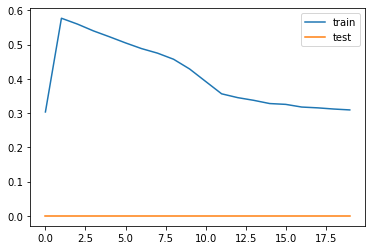

In [54]:
# Plotting history


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
 
# make a prediction
pred_y = model.predict(test_X)